In [2]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Cargar archivo csv
data= pd.read_csv('Ventas_totales_sin_nulos.csv')

In [4]:
#Verificamos los valores 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           65 non-null     int64  
 1   indice_tiempo                        65 non-null     object 
 2   ventas_precios_corrientes            65 non-null     float64
 3   ventas_precios_constantes            65 non-null     float64
 4   ventas_totales_canal_venta           65 non-null     float64
 5   salon_ventas                         65 non-null     float64
 6   canales_on_line                      65 non-null     float64
 7   ventas_totales_medio_pago            65 non-null     float64
 8   efectivo                             65 non-null     float64
 9   tarjetas_debito                      65 non-null     float64
 10  tarjetas_credito                     65 non-null     float64
 11  otros_medios                      

In [5]:
#Creo 2 dataframe para poder procesar los outliers
cuantitativas = data.iloc [: , 2:23]
cualitativas = data.iloc [: , [0,1]]

<Figure size 1500x800 with 0 Axes>

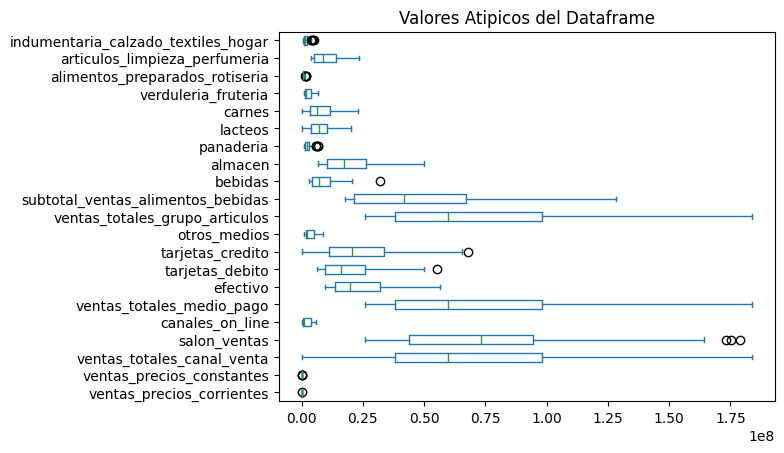

In [6]:
#Realizamos diagrama dde caja o bigote de cada columna 
fig = plt.figure (figsize=(15,8))
cuantitativas.plot (kind='box', vert=False)
plt.title ("Valores Atipicos del Dataframe")
plt.show() #Dibujamos el diagrama 

**Procedimiento "Desviacion estandar" Para eliminaar outliers en dataframe**

In [7]:
#Metodo aplicado desviacion estandar. Encuentro los valores extremos
y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print ("Limite inferior permitido", Limite_Inferior)

Limite superior permitido ventas_precios_corrientes              2.143126e+05
ventas_precios_constantes              4.002291e+04
ventas_totales_canal_venta             2.074407e+08
salon_ventas                           1.976066e+08
canales_on_line                        7.623053e+06
ventas_totales_medio_pago              2.059531e+08
efectivo                               6.191160e+07
tarjetas_debito                        5.817949e+07
tarjetas_credito                       7.611201e+07
otros_medios                           1.049208e+07
ventas_totales_grupo_articulos         2.059531e+08
subtotal_ventas_alimentos_bebidas      1.451900e+08
bebidas                                2.652722e+07
almacen                                5.504262e+07
panaderia                              6.904188e+06
lacteos                                2.243904e+07
carnes                                 2.525153e+07
verduleria_fruteria                    7.593897e+06
alimentos_preparados_rotiseria        

In [16]:
#Obtenemos datos y los outliers se convierten en nulos en el dataframe 
data3= cuantitativas[(y<=Limite_Superior) & (y>=Limite_Inferior)]
data3

,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,...,subtotal_ventas_alimentos_bebidas,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar
0,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,9.047205e+06,1716991.073,...,1.804379e+07,3.514467e+06,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05
1,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,1527488.518,...,1.765688e+07,3.344457e+06,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05
2,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,8.845010e+06,1782030.557,...,1.918625e+07,3.290739e+06,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05
3,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,9.458167e+06,1909221.374,...,2.025714e+07,3.253288e+06,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05
4,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,9.220930e+06,1864714.157,...,1.890457e+07,2.869437e+06,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,154517.1,NaN,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,5.404833e+07,7452508.718,...,1.037836e+08,2.036450e+07,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06
61,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,5.370589e+07,6922148.759,...,1.055305e+08,2.006756e+07,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,1.832572e+06
62,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,1.000000e+01,7940040.869,...,1.188230e+08,1.975921e+07,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06
63,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,6.535759e+07,1716991.000,...,1.277970e+08,2.064169e+07,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06


In [17]:
#Corroboramos valores nulos del dataframe 
valores_nulos= data3.isnull().sum()
valores_nulos

ventas_precios_corrientes              0
ventas_precios_constantes              2
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                1
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    1
dtype: int64

In [18]:
#Remplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,...,subtotal_ventas_alimentos_bebidas,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar
0,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,9.047205e+06,1716991.073,...,1.804379e+07,3.514467e+06,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05
1,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,1527488.518,...,1.765688e+07,3.344457e+06,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05
2,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,8.845010e+06,1782030.557,...,1.918625e+07,3.290739e+06,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05
3,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,9.458167e+06,1909221.374,...,2.025714e+07,3.253288e+06,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05
4,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,9.220930e+06,1864714.157,...,1.890457e+07,2.869437e+06,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,154517.1,25363.3,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,5.404833e+07,7452508.718,...,1.037836e+08,2.036450e+07,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06
61,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,5.370589e+07,6922148.759,...,1.055305e+08,2.006756e+07,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,1.832572e+06
62,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,1.000000e+01,7940040.869,...,1.188230e+08,1.975921e+07,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06
63,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,6.535759e+07,1716991.000,...,1.277970e+08,2.064169e+07,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06


In [20]:
#Corroboramos valores nulos del dataframe 
valores_nulos= data_clean.isnull().sum()
valores_nulos

ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
dtype: int64

**Procedimiento "Cuantiles" para ssustituir outliers en dataframe**

In [21]:
#Metodo aplicado Cuartiles. Enccuentro cuartiles 0.25 y 0.75
y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q2
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 + 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido ventas_precios_corrientes              1.923194e+05
ventas_precios_constantes              3.193875e+04
ventas_totales_canal_venta             1.875116e+08
salon_ventas                           1.704401e+08
canales_on_line                        9.196781e+06
ventas_totales_medio_pago              1.875116e+08
efectivo                               5.942022e+07
tarjetas_debito                        5.095222e+07
tarjetas_credito                       6.724505e+07
otros_medios                           1.061843e+07
ventas_totales_grupo_articulos         1.875116e+08
subtotal_ventas_alimentos_bebidas      1.359348e+08
bebidas                                2.282518e+07
almacen                                5.015298e+07
panaderia                              5.314390e+06
lacteos                                2.012752e+07
carnes                                 2.396900e+07
verduleria_fruteria                    7.832862e+06
alimentos_preparados_rotiseria        

In [22]:
#Obtenemos datos limpios del dataframe 
data3_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,...,subtotal_ventas_alimentos_bebidas,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,154517.1,NaN,154517094.2,149697614.6,NaN,154517094.2,46962602.22,46053650.13,54048333.12,7452508.718,...,103783610.3,20364496.48,37505172.62,4860317.680,16104766.21,17408486.73,6138441.197,1401929.429,21330213.29,3782646.219
61,152202.6,NaN,152202573.4,148406529.3,NaN,152202573.4,46290956.21,45283575.25,53705893.17,NaN,...,105530494.0,20067560.91,38209790.62,5045920.421,16139816.50,18260738.31,6436027.691,1370639.589,20305446.86,NaN
62,NaN,NaN,168982502.3,164321107.3,NaN,168982502.3,51262080.99,47364363.88,NaN,7940040.869,...,118823011.7,19759206.71,45418860.16,NaN,18419163.96,20827602.02,6886240.029,NaN,22942013.09,3912852.426
63,177148.1,NaN,177148082.8,NaN,NaN,177148082.8,53189998.68,50063972.79,65357591.09,NaN,...,127796957.0,20641687.40,49991675.91,NaN,19309461.59,22877841.24,6510665.781,NaN,23131265.85,NaN


In [24]:
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

ventas_precios_corrientes              58
ventas_precios_constantes              60
ventas_totales_canal_venta             57
salon_ventas                           58
canales_on_line                        64
ventas_totales_medio_pago              57
efectivo                               57
tarjetas_debito                        56
tarjetas_credito                       59
otros_medios                           59
ventas_totales_grupo_articulos         57
subtotal_ventas_alimentos_bebidas      57
bebidas                                57
almacen                                54
panaderia                              57
lacteos                                54
carnes                                 58
verduleria_fruteria                    59
alimentos_preparados_rotiseria         60
articulos_limpieza_perfumeria          59
indumentaria_calzado_textiles_hogar    57
dtype: int64

In [25]:
#Remplazamos valores atipicos (nulos) del dataframe con "mean"
#realizamos copia del dataframe 
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,...,subtotal_ventas_alimentos_bebidas,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar
0,161382.8,30131.5,162332761.4,139351757.5,5751181.8,162332761.4,49271257.00,43332959.20,56170596.40,7969403.200,...,112969100.0,19304580.40,40308570.00,4446217.500,16358708.20,19975807.90,6358197.500,1263304.400,22173586.30,3330829.300
1,161382.8,30131.5,162332761.4,139351757.5,5751181.8,162332761.4,49271257.00,43332959.20,56170596.40,7969403.200,...,112969100.0,19304580.40,40308570.00,4446217.500,16358708.20,19975807.90,6358197.500,1263304.400,22173586.30,3330829.300
2,161382.8,30131.5,162332761.4,139351757.5,5751181.8,162332761.4,49271257.00,43332959.20,56170596.40,7969403.200,...,112969100.0,19304580.40,40308570.00,4446217.500,16358708.20,19975807.90,6358197.500,1263304.400,22173586.30,3330829.300
3,161382.8,30131.5,162332761.4,139351757.5,5751181.8,162332761.4,49271257.00,43332959.20,56170596.40,7969403.200,...,112969100.0,19304580.40,40308570.00,4446217.500,16358708.20,19975807.90,6358197.500,1263304.400,22173586.30,3330829.300
4,161382.8,30131.5,162332761.4,139351757.5,5751181.8,162332761.4,49271257.00,43332959.20,56170596.40,7969403.200,...,112969100.0,19304580.40,40308570.00,4446217.500,16358708.20,19975807.90,6358197.500,1263304.400,22173586.30,3330829.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,154517.1,30131.5,154517094.2,149697614.6,5751181.8,154517094.2,46962602.22,46053650.13,54048333.12,7452508.718,...,103783610.3,20364496.48,37505172.62,4860317.680,16104766.21,17408486.73,6138441.197,1401929.429,21330213.29,3782646.219
61,152202.6,30131.5,152202573.4,148406529.3,5751181.8,152202573.4,46290956.21,45283575.25,53705893.17,7969403.200,...,105530494.0,20067560.91,38209790.62,5045920.421,16139816.50,18260738.31,6436027.691,1370639.589,20305446.86,3330829.300
62,161382.8,30131.5,168982502.3,164321107.3,5751181.8,168982502.3,51262080.99,47364363.88,56170596.40,7940040.869,...,118823011.7,19759206.71,45418860.16,4446217.500,18419163.96,20827602.02,6886240.029,1263304.400,22942013.09,3912852.426
63,177148.1,30131.5,177148082.8,139351757.5,5751181.8,177148082.8,53189998.68,50063972.79,65357591.09,7969403.200,...,127796957.0,20641687.40,49991675.91,4446217.500,19309461.59,22877841.24,6510665.781,1263304.400,23131265.85,3330829.300


In [26]:
#Unimos el dataframe cualitativo limpio, ahora con el cualitativo
Datos_limpios =  pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,...,subtotal_ventas_alimentos_bebidas,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar
0,0,01/01/2017,161382.8,30131.5,162332761.4,139351757.5,5751181.8,162332761.4,49271257.00,43332959.20,...,112969100.0,19304580.40,40308570.00,4446217.500,16358708.20,19975807.90,6358197.500,1263304.400,22173586.30,3330829.300
1,1,01/02/2017,161382.8,30131.5,162332761.4,139351757.5,5751181.8,162332761.4,49271257.00,43332959.20,...,112969100.0,19304580.40,40308570.00,4446217.500,16358708.20,19975807.90,6358197.500,1263304.400,22173586.30,3330829.300
2,2,01/03/2017,161382.8,30131.5,162332761.4,139351757.5,5751181.8,162332761.4,49271257.00,43332959.20,...,112969100.0,19304580.40,40308570.00,4446217.500,16358708.20,19975807.90,6358197.500,1263304.400,22173586.30,3330829.300
3,3,01/04/2017,161382.8,30131.5,162332761.4,139351757.5,5751181.8,162332761.4,49271257.00,43332959.20,...,112969100.0,19304580.40,40308570.00,4446217.500,16358708.20,19975807.90,6358197.500,1263304.400,22173586.30,3330829.300
4,4,01/05/2017,161382.8,30131.5,162332761.4,139351757.5,5751181.8,162332761.4,49271257.00,43332959.20,...,112969100.0,19304580.40,40308570.00,4446217.500,16358708.20,19975807.90,6358197.500,1263304.400,22173586.30,3330829.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,60,01/01/2022,154517.1,30131.5,154517094.2,149697614.6,5751181.8,154517094.2,46962602.22,46053650.13,...,103783610.3,20364496.48,37505172.62,4860317.680,16104766.21,17408486.73,6138441.197,1401929.429,21330213.29,3782646.219
61,61,01/02/2022,152202.6,30131.5,152202573.4,148406529.3,5751181.8,152202573.4,46290956.21,45283575.25,...,105530494.0,20067560.91,38209790.62,5045920.421,16139816.50,18260738.31,6436027.691,1370639.589,20305446.86,3330829.300
62,62,01/03/2022,161382.8,30131.5,168982502.3,164321107.3,5751181.8,168982502.3,51262080.99,47364363.88,...,118823011.7,19759206.71,45418860.16,4446217.500,18419163.96,20827602.02,6886240.029,1263304.400,22942013.09,3912852.426
63,63,01/04/2022,177148.1,30131.5,177148082.8,139351757.5,5751181.8,177148082.8,53189998.68,50063972.79,...,127796957.0,20641687.40,49991675.91,4446217.500,19309461.59,22877841.24,6510665.781,1263304.400,23131265.85,3330829.300


In [27]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

Unnamed: 0                             0
indice_tiempo                          0
ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
dtype: int64

In [29]:
#Convertimos valores limpios a csv
Datos_limpios.to_csv("Datos_limpios.csv")